<a href="https://colab.research.google.com/github/shauryasachdev/Deep-Learning/blob/main/Classification_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_cpu==2.19.0
!pip install matplotlib==3.9.2

print("============= All Required Libraries Installed ==========")

============= All Required Libraries Installed ==========


In [2]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

In [4]:
import matplotlib.pyplot as plt

In [5]:
# import the data
from keras.datasets import mnist

# read the data, re-loading to ensure Y_train/Y_test are fresh 1D integer labels
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

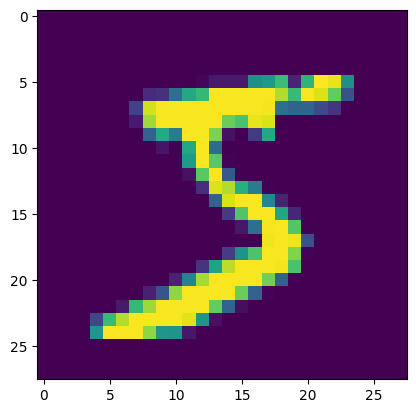

In [8]:
plt.imshow(X_train[0])

In [9]:
# flatten image to 1-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2]   # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')    # flatten testing images


In [10]:
print(X_train.shape)

(60000, 784)


In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
# one hot encode outputs
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

num_classes = Y_test.shape[1]
print(num_classes)

10


In [13]:
# define classification model

def classification_model():

  model = Sequential()
  model.add(Input(shape=(num_pixels,)))
  model.add(Dense(num_pixels, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  # compile model

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [14]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/10
1875/1875 - 34s - 18ms/step - accuracy: 0.9443 - loss: 0.1849 - val_accuracy: 0.9729 - val_loss: 0.0847
Epoch 2/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9752 - loss: 0.0781 - val_accuracy: 0.9769 - val_loss: 0.0721
Epoch 3/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9826 - loss: 0.0548 - val_accuracy: 0.9737 - val_loss: 0.0838
Epoch 4/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9879 - loss: 0.0392 - val_accuracy: 0.9782 - val_loss: 0.0815
Epoch 5/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9896 - loss: 0.0323 - val_accuracy: 0.9811 - val_loss: 0.0710
Epoch 6/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9914 - loss: 0.0275 - val_accuracy: 0.9788 - val_loss: 0.0817
Epoch 7/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9921 - loss: 0.0232 - val_accuracy: 0.9785 - val_loss: 0.0881
Epoch 8/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9937 - loss: 0.0193 - val_accuracy: 0.9813 - val_loss: 0.0761
Epoch 9/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9939 - loss: 0.0195 - val_a

In [15]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9829999804496765% 
 Error: 0.017000019550323486


In [16]:
model.save('classification_model.keras')

In [17]:
pretrained_model = keras.saving.load_model('classification_model.keras')

In [20]:
def classification_model_6layers():

    # create model
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))  # Set the number of input features
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [21]:

# build the model
model_6layers = classification_model_6layers()

# fit the model
model_6layers.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=2)

# evaluate the model
scores_6layers = model_6layers.evaluate(X_test, Y_test, verbose=0)

print('Accuracy_3_layers: {} \n Accuracy_6_layers: {}'.format(scores[1], scores_6layers[1]))

Epoch 1/10
1875/1875 - 25s - 13ms/step - accuracy: 0.9326 - loss: 0.2191 - val_accuracy: 0.9646 - val_loss: 0.1178
Epoch 2/10
1875/1875 - 41s - 22ms/step - accuracy: 0.9712 - loss: 0.0991 - val_accuracy: 0.9714 - val_loss: 0.0979
Epoch 3/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9783 - loss: 0.0736 - val_accuracy: 0.9755 - val_loss: 0.0836
Epoch 4/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9836 - loss: 0.0565 - val_accuracy: 0.9749 - val_loss: 0.0900
Epoch 5/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9859 - loss: 0.0476 - val_accuracy: 0.9772 - val_loss: 0.0871
Epoch 6/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9878 - loss: 0.0410 - val_accuracy: 0.9776 - val_loss: 0.0858
Epoch 7/10
1875/1875 - 27s - 14ms/step - accuracy: 0.9899 - loss: 0.0356 - val_accuracy: 0.9746 - val_loss: 0.1174
Epoch 8/10
1875/1875 - 38s - 20ms/step - accuracy: 0.9908 - loss: 0.0317 - val_accuracy: 0.9817 - val_loss: 0.0836
Epoch 9/10
1875/1875 - 25s - 13ms/step - accuracy: 0.9926 - loss: 0.0263 - val_a

In [23]:
pretrained_model = keras.saving.load_model('classification_model.keras')
print("Pre-trained model loaded successufully")

Pre-trained model loaded successufully


In [24]:
pretrained_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 26s - 14ms/step - accuracy: 0.9952 - loss: 0.0156 - val_accuracy: 0.9819 - val_loss: 0.0877
Epoch 2/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9955 - loss: 0.0131 - val_accuracy: 0.9819 - val_loss: 0.0976
Epoch 3/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9960 - loss: 0.0121 - val_accuracy: 0.9805 - val_loss: 0.1031
Epoch 4/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9962 - loss: 0.0121 - val_accuracy: 0.9796 - val_loss: 0.1213
Epoch 5/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.9824 - val_loss: 0.1068
Epoch 6/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9964 - loss: 0.0121 - val_accuracy: 0.9793 - val_loss: 0.1167
Epoch 7/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9965 - loss: 0.0121 - val_accuracy: 0.9841 - val_loss: 0.0908
Epoch 8/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9970 - loss: 0.0106 - val_accuracy: 0.9820 - val_loss: 0.1145
Epoch 9/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9980 - loss: 0.0061 - val_a

In [28]:
# evaluate the model
scores_20_epochs = pretrained_model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy_10_epochs: {} \n Accuracy_20_epochs: {}'.format(scores[1], scores_20_epochs[1]))
print('Errors_10_epochs: {} \n Error_20_epochs: {}'.format(1 - scores[1], 1 - scores_20_epochs[1]))

Accuracy_10_epochs: 0.9829999804496765 
 Accuracy_20_epochs: 0.9817000031471252
Errors_10_epochs: 0.017000019550323486 
 Error_20_epochs: 0.018299996852874756
